In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Flatten,LSTM,Dropout
import time

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#matplotlib inline
plt.rcParams['figure.figsize'] = 16,6
plt.rcParams['xtick.color'] = 'w'  
plt.rcParams['ytick.color'] = 'w'  
mpl.style.use('ggplot')

## 数据导入和处理

In [3]:
train_df_path = r'../data/processed_data/train_df.csv'
test_df_path = r'../data/processed_data/test_df.csv'

In [4]:
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)

In [5]:
train_df.head()

,Unnamed: 0,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,...,s14,s15,s16,s17,s18,s19,s20,s21,RUL,cycle_norm
0,0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,...,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,130,0.00000
1,1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,...,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,130,0.00277
2,2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,...,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,130,0.00554
3,3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,...,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,130,0.00831
4,4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,...,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,130,0.01108


In [6]:
X_train = train_df.iloc[0:-1,6:27]
y_train = train_df.iloc[0:-1,-2]
X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
X_test = test_df.iloc[:,6:27]
y_test = test_df.iloc[:,-2]
X_test = np.array(X_test)
y_test = np.array(y_test)

In [8]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(20630, 21) (20630,) (13096, 21) (13096,)


现在X_train, y_train, X_test, y_test已经准备好了

## 模型构建

In [9]:
# 数据改造成LSTM输入的格式
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(20630, 1, 21) (20630,) (13096, 1, 21) (13096,)


In [10]:
model = Sequential()

In [11]:
model.add(LSTM(40,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')

## 模型训练

In [12]:
start_time = time.clock()
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=100,
    validation_data=(X_test, y_test),verbose=1,shuffle=False)
end_time = time.clock()
print("Training time: {:.4} minutes".format((end_time-start_time)/60))

Train on 20630 samples, validate on 13096 samples
Epoch 1/50
20630/20630 [==============================] - 2s 110us/step - loss: 9079.5674 - val_loss: 119.8846
Epoch 2/50
20630/20630 [==============================] - 1s 39us/step - loss: 6957.9675 - val_loss: 487.6403
Epoch 3/50
20630/20630 [==============================] - 1s 39us/step - loss: 5858.2753 - val_loss: 834.8654
Epoch 4/50
20630/20630 [==============================] - 1s 39us/step - loss: 5098.0713 - val_loss: 1215.3297
Epoch 5/50
20630/20630 [==============================] - 1s 39us/step - loss: 4485.1705 - val_loss: 1624.2949
Epoch 6/50
20630/20630 [==============================] - 1s 39us/step - loss: 3979.2466 - val_loss: 2055.0552
Epoch 7/50
20630/20630 [==============================] - 1s 40us/step - loss: 3559.1081 - val_loss: 2500.6252
Epoch 8/50
20630/20630 [==============================] - 1s 40us/step - loss: 3210.7778 - val_loss: 2954.0028
Epoch 9/50
20630/20630 [==============================] - 1s 39u

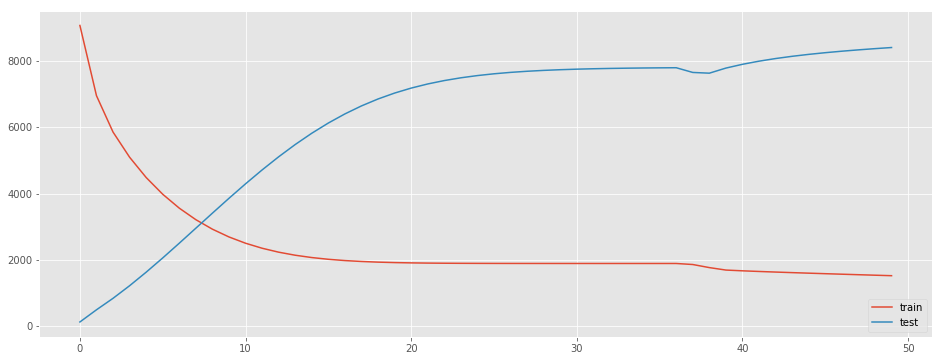

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test') 
plt.legend()  
plt.show()